In [2]:
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

We are going to start with the rejection-acceptance method first, and compare it to the case where we plug the random variables into the inverse of the CDF. In order to do that, you must compute the inverse. Luckily in this example it's not too tricky.

In [77]:
total=10000

Let's define the probability distribution as a function. We have that $P(x) = (1/(e-1))e^x$ if x is within $0<x<1$.

In [36]:
def prob(x):
    p=(1/(np.exp(1)-1))*np.exp(x) 
    return p

Now we accept/reject and redraw uniform random numbers until we have enough samples. It's important to have our 'decision rule' normalized by the maximum of the $P(x)$ distribution so that we don't miss the tail of the distribution.

In [78]:
save = np.zeros(total)
num=0
while num<total:
    xx,yy = np.random.rand(2)
    if yy<prob(xx)/prob(1):
        save[num]=xx
        num+=1    

Now plot the results! We are showing histograms of the random variables, the samples accepted by our algorithm and then the $P(x)$ function itself.

Text(0,0.5,'$N(x)$')

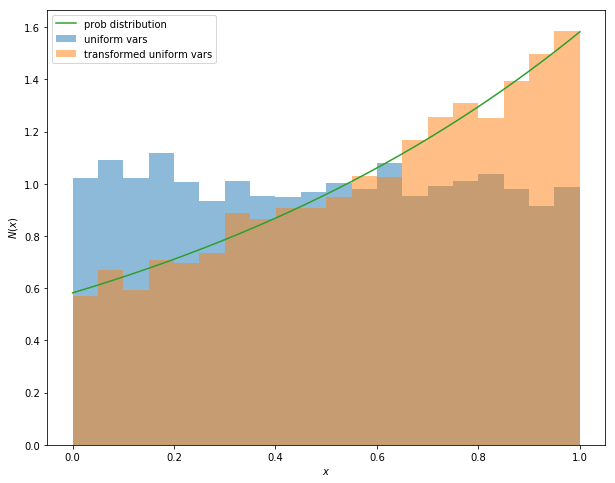

In [81]:
plt.figure(figsize=(10,8))
plt.hist(x,20, label='uniform vars', normed=True, alpha=0.5)
plt.hist(save,20, label='transformed uniform vars', normed=True, alpha=0.5)
xplot = np.linspace(0,1,total)
plt.plot(xplot,prob(xplot), label='prob distribution')
leg =plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$N(x)$')

For the next step we need to define $F(x)$, the CDF and it's inverse $F^{-1}(x)$. In this case we chose an example that you can integrate and then invert easily.

In [62]:
def cdf_prob(x):
    p = np.log(x*(np.exp(1)-1)+1)
    return p

Note in the step below can now proceed easily, and is much faster than the accept-reject approach.

Text(0,0.5,'$N(x)$')

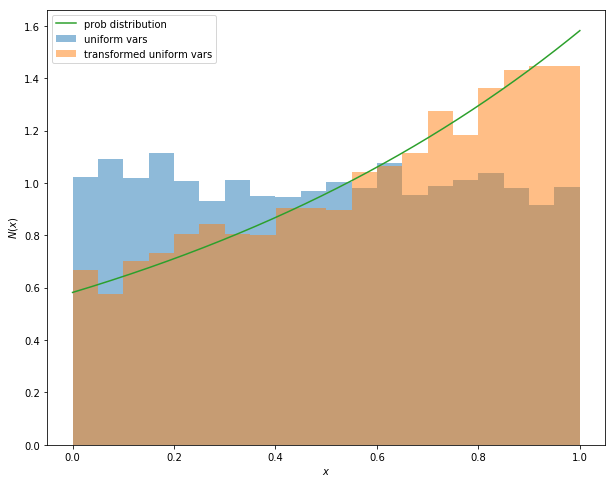

In [80]:
x = np.random.rand(total)
plt.figure(figsize=(10,8))
plt.hist(x,20, label='uniform vars', normed=True, alpha=0.5)
plt.hist(cdf_prob(x),20, label='transformed uniform vars', normed=True,alpha=0.5)
xplot = np.linspace(0,1,total)
plt.plot(xplot,prob(xplot), label='prob distribution')
leg =plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$N(x)$')